In [62]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
from sklearn.datasets import load_wine

wine = load_wine()

In [144]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [151]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df["target"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [152]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [153]:
from sklearn.model_selection import train_test_split
X = df.drop("target",axis=1)
y = df["target"]

X_train , X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [154]:
len(X_train)

142

In [155]:
len(X_test)

36

In [156]:
len(y_train) , len(y_test)

(142, 36)

In [158]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [159]:
y_pred = model.predict(X_test)

In [160]:
y_pred[:5]

array([2, 0, 0, 2, 2])

In [161]:
y_test.head(5)

,target
152,2
39,0
35,0
147,2
132,2


In [162]:
model.score(X_test,y_test)

0.9444444444444444

In [166]:
len(y_pred) , len(y_test)

(36, 36)

In [171]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 10]])

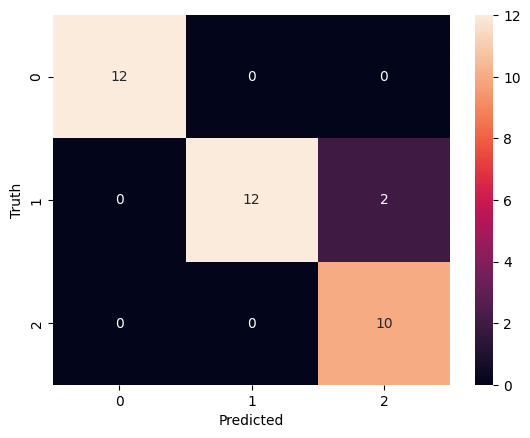

In [172]:
import seaborn as sns

sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [173]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

